In [14]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
checkpoints = torch.load('resulting_clusterings-wo_rho/census_income/best_dec_nclusters2_g100.0_run10.pt', map_location=torch.device('cpu'))


In [46]:
datasets = ['dutch_census', 'census_income', 'compas', 'german_data']
gammas = ['0.0', '1.0', '10.0', '100.0']
run_ids = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

results_last = pd.DataFrame(columns = ['datasets', 'gamma', 'loss', 'balance', 'id'])

for d in datasets:
    for g in gammas:
        for r in run_ids:
            checkpoints = torch.load(f'resulting_clusterings-wo_rho/{d}/best_dec_nclusters2_g{g}_run{r}.pt', map_location=torch.device('cpu'))
            results_last = results_last.append({'datasets': d,
                                                'gamma': g,
                                                'loss': checkpoints['loss_iterations'][-1],
                                                'balance': checkpoints['balance_iterations'][-1].min(),
                                                'id': r}, ignore_index=True)


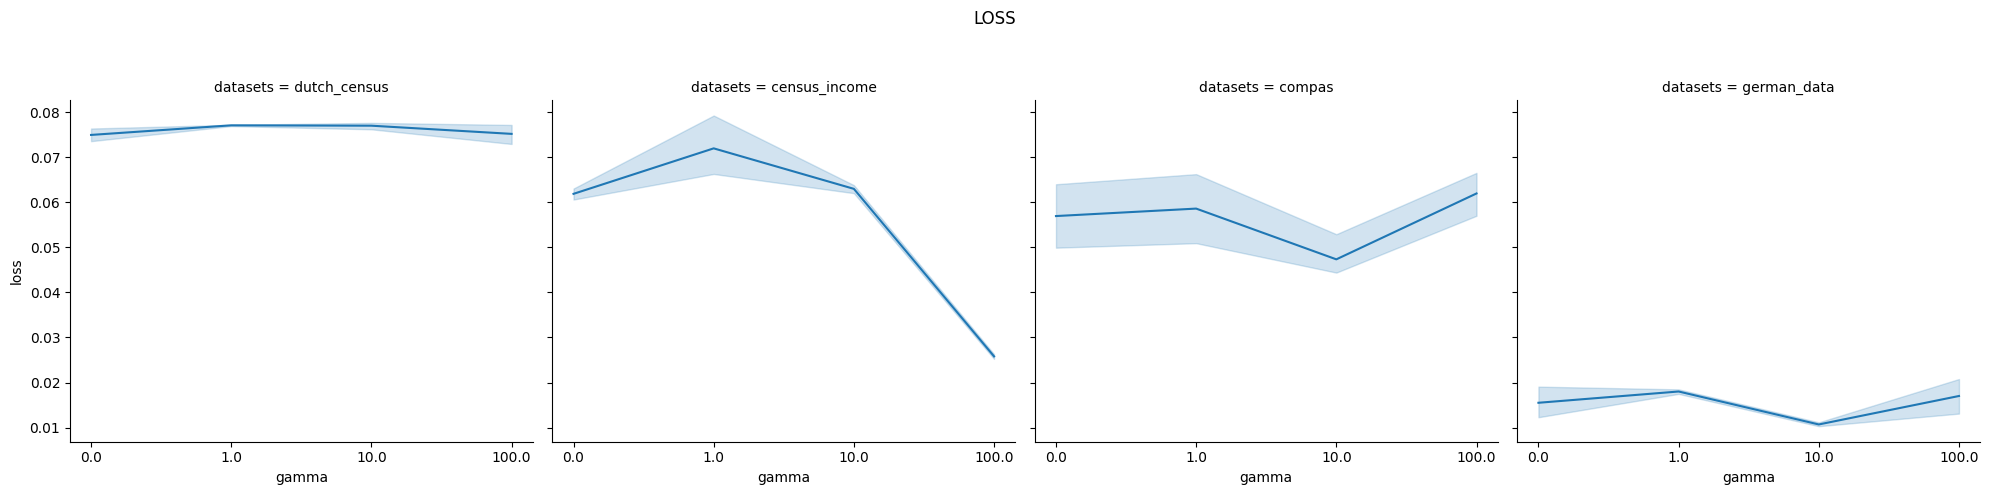

In [67]:
rel = sns.relplot(data=results_last, x='gamma', y='loss', col='datasets', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('LOSS')
plt.show()

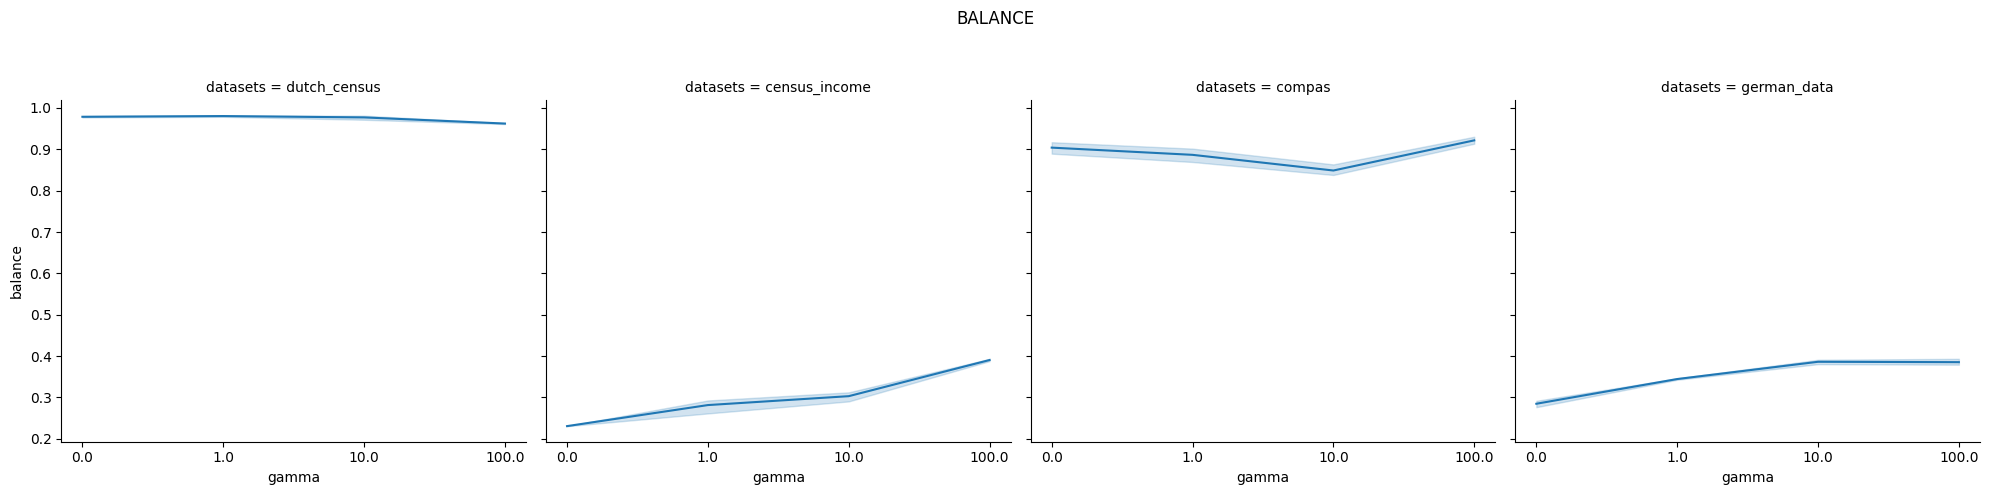

In [68]:
rel = sns.relplot(data=results_last, x='gamma', y='balance', col='datasets', kind='line')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('BALANCE')
plt.show()